In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import h5py
import math

# from mpl_toolkits.mplot3d import axes3d
# %matplotlib widget

In [2]:
Nc=4
Nf=1

In [3]:
Ns=32
Nt=8

In [4]:
nbetas = {
    '0p2000':9,
    '0p3000':8,
    '0p4000':8
}
nbins=10

In [5]:
nbetasMeas=1000

In [6]:
ibetac02 = int(np.loadtxt( "../spline_cpp/betac_ibetac_mass0p2000_"+str(Ns)+".dat" )[1])
window02 = np.arange( 780, ibetac02 )
window02n = np.arange( 780, 796 )

ibetac03 = int(np.loadtxt( "../spline_cpp/betac_ibetac_mass0p3000_"+str(Ns)+".dat" )[1])
window03 = np.arange( 360, ibetac03 )
window03n = np.arange( 360, 487 )

ibetac04 = int(np.loadtxt( "../spline_cpp/betac_ibetac_mass0p4000_"+str(Ns)+".dat" )[1])
window04 = np.arange( 700, ibetac04 )
window04n = np.arange( 700, 807 )

In [7]:
ibetac0s = {
    "0p2000": ibetac02,
    "0p3000": ibetac03,
    "0p4000": ibetac04
}

In [8]:
windows = {
    "0p2000": window02,
    "0p3000": window03,
    "0p4000": window04
}

In [9]:
windows2 = {
    "0p2000": window02n,
    "0p3000": window03n,
    "0p4000": window04n
}

In [10]:
class Jackknife:
    def __init__( self, len_data, binsize ):
        self.binsize = binsize
        self.nbins = math.floor( len_data/self.binsize )
        self.N = self.binsize * self.nbins
        self.jack_avg = []
        self.est = 0
        self.var_est = 0

    def set( self, func, list_of_data ):
        for i in range( self.nbins ):
            self.jack_avg.append( func( i, self.binsize, list_of_data ) )

    def do_it( self ):
        for i in range( 0, self.nbins ):
            self.est += self.jack_avg[i]
        self.est /= self.nbins

        for i in range( 0, self.nbins ):
            self.var_est += ( self.jack_avg[i] - self.est )**2
        self.var_est /= self.nbins
        self.var_est *= self.nbins -1

    def mean( self ):
        return self.est

    def var( self ):
        return self.var_est

    def err( self ):
        return np.sqrt(self.var_est)

def simple_mean(i, binsize, np_data):
    resmpld = np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
    return np.mean(resmpld, axis=0)

def jk_avg(i, binsize, np_data):
    return np_data[i]

def format_print(cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'

def format_print_w_exact(exact, cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'+': '+'{num:.{width}f}'.format(num=(exact-cen)/err, width=i+1)+' sigma'

In [11]:
gstar_HSDM = 2*(Nc**2-1)+2*Nf**2
gstar_SM = 106.75
gstar = gstar_SM + gstar_HSDM

In [12]:
MP_GeV = 1.220890 * 10**19 # GeV https://physics.nist.gov/cgi-bin/cuu/Value?plkmc2gev

In [13]:
# Get S3hat as a func of T and MB

In [14]:
mass="0p2000"

In [15]:
S3hats_=[]
for ibeta in windows2[mass]:
    tmp = np.loadtxt("../spline_cpp/fit_params_32c_m"+mass+"/Scl_"+str(ibeta)+".dat")
    S3hats_.append(tmp)
S3hats = np.array(S3hats_)

In [16]:
err_sq = 0.0*windows2[mass]

for jdrop in np.arange(nbetas[mass]):

    jk_data_ = []
    for ibin in np.arange(nbins):
        print( jdrop, ibin )
        S3hats_ = []
        for ibeta in windows2[mass]:
            tmp = np.loadtxt("../spline_cpp/fit_params_32c_m"+mass+"_jk_"+str(jdrop)+"_10_"+str(ibin)+"/Scl_"+str(ibeta)+".dat")
            S3hats_.append(tmp)
        
        S3hats = np.array(S3hats_)
        jk_data_.append( S3hats )
    jk_data = np.array( jk_data_ )

    jk = Jackknife( nbins, 1 )
    jk.set( jk_avg, jk_data )
    jk.do_it()
    err_sq += jk.err()**2

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9


In [17]:
betas = np.loadtxt( "../spline_cpp/betas_mass"+mass+"_32.dat" )

In [18]:
x = betas[ windows2[mass] ]
y = S3hats
dy = np.sqrt( err_sq )

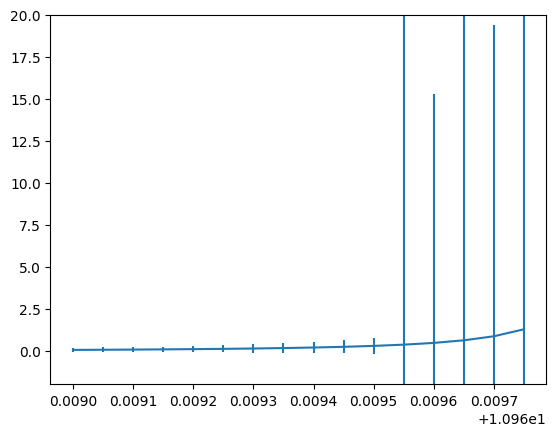

In [19]:
plt.clf()
plt.errorbar( x, y, dy )
plt.ylim( -2, 20 )
plt.show()

In [20]:
beta_S3hat_err02 = [x, y, dy]

In [21]:
mass="0p3000"

In [22]:
S3hats_=[]
for ibeta in windows2[mass]:
    tmp = np.loadtxt("../spline_cpp/fit_params_32c_m"+mass+"/Scl_"+str(ibeta)+".dat")
    S3hats_.append(tmp)
S3hats = np.array(S3hats_)

In [23]:
err_sq = 0.0*windows2[mass]

for jdrop in np.arange(nbetas[mass]):

    jk_data_ = []
    for ibin in np.arange(nbins):
        print( jdrop, ibin )
        S3hats_ = []
        for ibeta in windows2[mass]:
            tmp = np.loadtxt("../spline_cpp/fit_params_32c_m"+mass+"_jk_"+str(jdrop)+"_10_"+str(ibin)+"/Scl_"+str(ibeta)+".dat")
            S3hats_.append(tmp)
        
        S3hats = np.array(S3hats_)
        jk_data_.append( S3hats )
    jk_data = np.array( jk_data_ )

    jk = Jackknife( nbins, 1 )
    jk.set( jk_avg, jk_data )
    jk.do_it()
    err_sq += jk.err()**2

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9


In [24]:
betas = np.loadtxt( "../spline_cpp/betas_mass"+mass+"_32.dat" )

In [25]:
x = betas[ windows2[mass] ]
y = S3hats
dy = np.sqrt( err_sq )

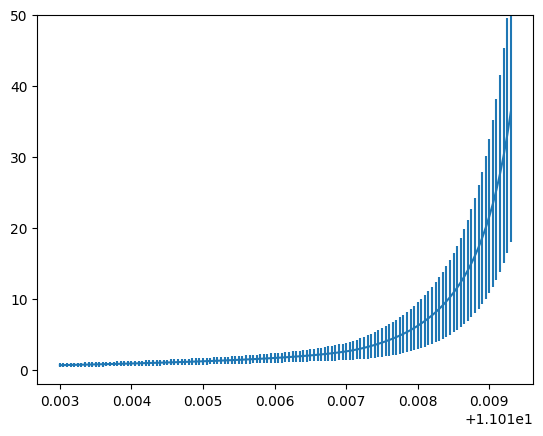

In [26]:
plt.clf()
plt.errorbar( x, y, dy )
plt.ylim( -2, 50 )
plt.show()

In [27]:
beta_S3hat_err03 = [x, y, dy]

In [28]:
mass="0p4000"

In [29]:
S3hats_=[]
for ibeta in windows2[mass]:
    tmp = np.loadtxt("../spline_cpp/fit_params_32c_m"+mass+"/Scl_"+str(ibeta)+".dat")
    S3hats_.append(tmp)
S3hats = np.array(S3hats_)

In [30]:
err_sq = 0.0*windows2[mass]

for jdrop in np.arange(nbetas[mass]):

    jk_data_ = []
    for ibin in np.arange(nbins):
        print( jdrop, ibin )
        S3hats_ = []
        for ibeta in windows2[mass]:
            tmp = np.loadtxt("../spline_cpp/fit_params_32c_m"+mass+"_jk_"+str(jdrop)+"_10_"+str(ibin)+"/Scl_"+str(ibeta)+".dat")
            S3hats_.append(tmp)
        
        S3hats = np.array(S3hats_)
        jk_data_.append( S3hats )
    jk_data = np.array( jk_data_ )

    jk = Jackknife( nbins, 1 )
    jk.set( jk_avg, jk_data )
    jk.do_it()
    err_sq += jk.err()**2

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9


In [31]:
betas = np.loadtxt( "../spline_cpp/betas_mass"+mass+"_32.dat" )

In [32]:
x = betas[ windows2[mass] ]
y = S3hats
dy = np.sqrt( err_sq )

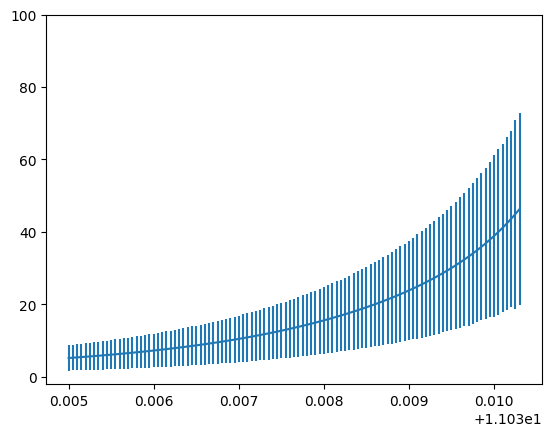

In [33]:
plt.clf()
plt.errorbar( x, y, dy )
plt.ylim( -2, 100 )
plt.show()

In [34]:
beta_S3hat_err04 = [x, y, dy]

In [35]:
def SclPrime_fitter(TmTc_MB, b, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return c1*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc + c2*(MB-Mc)**(2.*gam) * (1.0 + b/(MB-Mc) )**2/TmTc**2

fit DeltaV against T-Tc, MB

y error = D_DeltaV (jackknife)

x errors = delta fit functions

In [36]:
from f import F_ainv
from f import F_MB
from f import F_TmTc

In [37]:
from f2 import F_Tc

In [38]:
f_ainv = F_ainv()
f_MB = F_MB()
f_TmTc = F_TmTc( Nt )

In [39]:
x_dx_y_dy_z_dz = []

In [40]:
# 0p2

In [41]:
betas = beta_S3hat_err02[0]
mq = 0.2
mass="0p2000"

In [42]:
betas_all = np.loadtxt( "../spline_cpp/betas_mass"+mass+"_32.dat" )
betac = betas_all[ibetac0s[mass]]

In [43]:
MBs = f_MB( betas, mq )
DMBs = np.array([f_MB.D( beta, mq ) for beta in betas ])

dbetas = betas - betac
TmTcs = [f_TmTc( dbeta, mq ) for dbeta in dbetas]
DTmTcs = [f_TmTc.D( dbeta, mq ) for dbeta in dbetas]

In [44]:
x_dx_y_dy_z_dz.append( [ TmTcs, DTmTcs, MBs, DMBs, beta_S3hat_err02[1], beta_S3hat_err02[2] ] )

In [45]:
# 0p3

In [46]:
betas = beta_S3hat_err03[0]
mq = 0.3
mass="0p3000"

In [47]:
betas_all = np.loadtxt( "../spline_cpp/betas_mass"+mass+"_32.dat" )
betac = betas_all[ibetac0s[mass]]

In [48]:
MBs = f_MB( betas, mq )
DMBs = np.array([f_MB.D( beta, mq ) for beta in betas ])

dbetas = betas - betac
TmTcs = [f_TmTc( dbeta, mq ) for dbeta in dbetas]
DTmTcs = [f_TmTc.D( dbeta, mq ) for dbeta in dbetas]

In [49]:
x_dx_y_dy_z_dz.append( [ TmTcs, DTmTcs, MBs, DMBs, beta_S3hat_err03[1], beta_S3hat_err03[2] ] )

In [50]:
# 0p4

In [51]:
betas = beta_S3hat_err04[0]
mq = 0.4
mass="0p4000"

In [52]:
betas_all = np.loadtxt( "../spline_cpp/betas_mass"+mass+"_32.dat" )
betac = betas_all[ibetac0s[mass]]

In [53]:
MBs = f_MB( betas, mq )
DMBs = np.array([f_MB.D( beta, mq ) for beta in betas ])

dbetas = betas - betac
TmTcs = [f_TmTc( dbeta, mq ) for dbeta in dbetas]
DTmTcs = [f_TmTc.D( dbeta, mq ) for dbeta in dbetas]

In [54]:
x_dx_y_dy_z_dz.append( [ TmTcs, DTmTcs, MBs, DMBs, beta_S3hat_err04[1], beta_S3hat_err04[2] ] )

In [55]:
len(x_dx_y_dy_z_dz)

3

In [56]:
xs = np.array([])
dxs = np.array([])
ys = np.array([])
dys = np.array([])
zs = np.array([])
dzs = np.array([])

for row in x_dx_y_dy_z_dz:
    xs = np.concatenate( [ xs, row[0] ] )
    dxs = np.concatenate( [ dxs, row[1] ] )
    ys = np.concatenate( [ ys, row[2] ] )
    dys = np.concatenate( [ dys, row[3] ] )
    zs = np.concatenate( [ zs, row[4] ] )
    dzs = np.concatenate( [ dzs, row[5] ] )

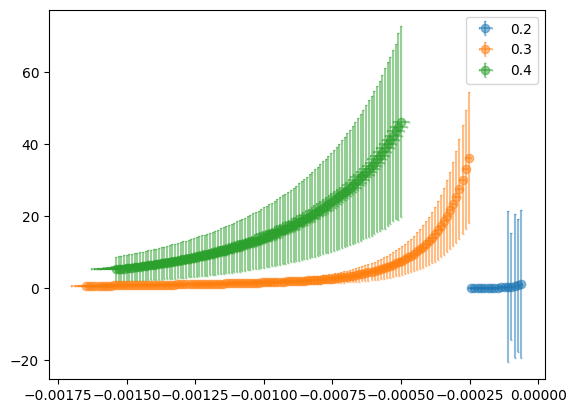

In [57]:
plt.clf()
plt.errorbar( x_dx_y_dy_z_dz[0][0], x_dx_y_dy_z_dz[0][4], 
             yerr=x_dx_y_dy_z_dz[0][5], xerr=x_dx_y_dy_z_dz[0][1], 
             capsize=1, alpha=0.5, ls='none', marker='o', label='0.2' )

plt.errorbar( x_dx_y_dy_z_dz[1][0], x_dx_y_dy_z_dz[1][4], 
             yerr=x_dx_y_dy_z_dz[1][5], xerr=x_dx_y_dy_z_dz[1][1], 
             capsize=1, alpha=0.5, ls='none', marker='o', label='0.3' )

plt.errorbar( x_dx_y_dy_z_dz[2][0], x_dx_y_dy_z_dz[2][4], 
             yerr=x_dx_y_dy_z_dz[2][5], xerr=x_dx_y_dy_z_dz[2][1], 
             capsize=1, alpha=0.5, ls='none', marker='o', label='0.4' )

plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

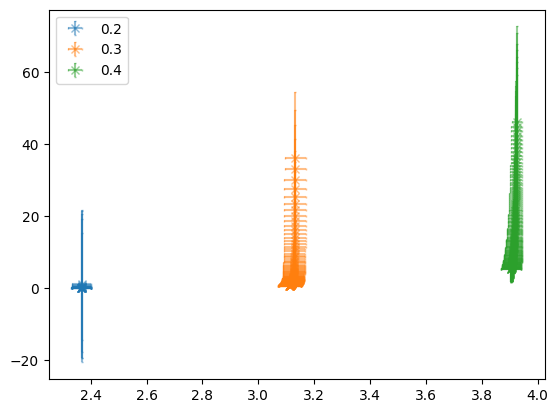

In [58]:
plt.clf()
plt.errorbar( x_dx_y_dy_z_dz[0][2], x_dx_y_dy_z_dz[0][4], 
             yerr=x_dx_y_dy_z_dz[0][5], xerr=x_dx_y_dy_z_dz[0][3], 
             capsize=1, alpha=0.5, ls='none', marker='x', label='0.2' )

plt.errorbar( x_dx_y_dy_z_dz[1][2], x_dx_y_dy_z_dz[1][4], 
             yerr=x_dx_y_dy_z_dz[1][5], xerr=x_dx_y_dy_z_dz[1][3], 
             capsize=1, alpha=0.5, ls='none', marker='x', label='0.3' )

plt.errorbar( x_dx_y_dy_z_dz[2][2], x_dx_y_dy_z_dz[2][4], 
             yerr=x_dx_y_dy_z_dz[2][5], xerr=x_dx_y_dy_z_dz[2][3], 
             capsize=1, alpha=0.5, ls='none', marker='x', label='0.4' )

plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

In [73]:
xs = np.array([])
dxs = np.array([])
ys = np.array([])
dys = np.array([])
zs = np.array([])
dzs = np.array([])

# k1=10
# k2=23
# k3=40

# k1=30
# k2=30
# k3=40

# k1=40
# k2=40
# k3=50

k1=7
k2=18 # 15
k3=25
# k3=30

k1=20
k2=28 # 15
k3=50

counter=0
ks=[k1,k2,k3]
for row in x_dx_y_dy_z_dz:
    k=ks[counter]
    print(k)
    counter+=1
    xs = np.concatenate( [ xs, row[0][-k:] ] )
    dxs = np.concatenate( [ dxs, row[1][-k:] ] )
    ys = np.concatenate( [ ys, row[2][-k:] ] )
    dys = np.concatenate( [ dys, row[3][-k:] ] )
    zs = np.concatenate( [ zs, row[4][-k:] ] )
    dzs = np.concatenate( [ dzs, row[5][-k:] ] )

20
28
50


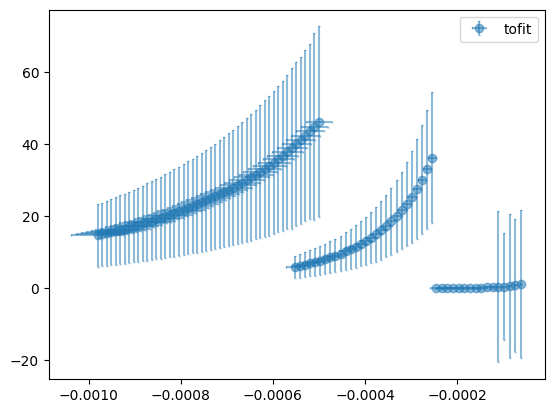

In [74]:
plt.clf()
plt.errorbar( xs, zs, 
             yerr=dzs, xerr=dxs, 
             capsize=1, alpha=0.5, ls='none', marker='o', label='tofit' )

plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

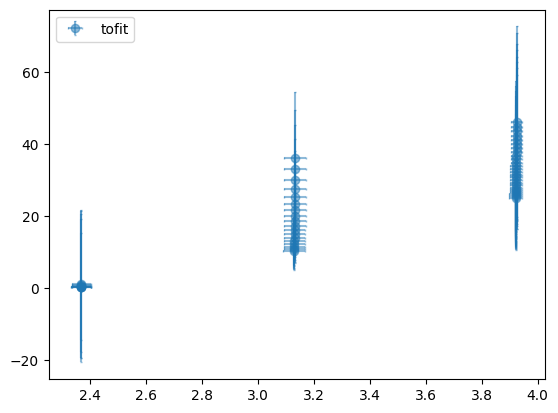

In [1765]:
plt.clf()
plt.errorbar( ys, zs, 
             yerr=dzs, xerr=dys, 
             capsize=1, alpha=0.5, ls='none', marker='o', label='tofit' )

plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

In [1766]:
# def S3hat_fitter(TmTc_MB, Mc, b, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#     return c1*fac  + c2*fac**2

In [1767]:
# def S3hat_fitter(TmTc_MB, Mc, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (MB-Mc)**gam  * ( c1/TmTc + c2/TmTc**2 )

In [1768]:
def S3hat_fitter(TmTc_MB, Mc, c0, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return (MB-Mc)**gam  * ( c0 + c1/TmTc + c2/TmTc**2 )

In [1769]:
# def S3hat_fitter(TmTc_MB, a0, a1, b0, b1, c0, c1 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a0 + a1*MB + ( b0 + b1*MB )/TmTc + ( c0 + c1*MB )/TmTc**2

In [1770]:
# def S3hat_fitter(TmTc_MB, b0, b1, c0, c1 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return ( b0 + b1*MB )/TmTc + ( c0 + c1*MB )/TmTc**2

In [1771]:
# def S3hat_fitter(TmTc_MB, Mc, c1, c2, gam, c3 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (MB-Mc)**gam  * ( c1/TmTc + c2/TmTc**2 ) * ( 1.0 + c3*(MB-Mc) )

In [1772]:
# def S3hat_fitter(TmTc_MB, Mc, c1, c2, gam1, gam2 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (MB-Mc)**gam1  *  c1/TmTc + (MB-Mc)**gam2 * c2/TmTc**2

In [1773]:
# def d0_S3hat_fitter(TmTc_MB, Mc, b, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#     dfac = -(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc**2
#     return c1*dfac  + 2.0*c2*dfac*fac

In [1774]:
# def d0_S3hat_fitter(TmTc_MB, Mc, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (MB-Mc)**gam  * ( -1.0*c1/TmTc**2 -2.0 * c2/TmTc**3 )

In [1775]:
def d0_S3hat_fitter(TmTc_MB, Mc, c0, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return (MB-Mc)**gam  * ( -1.0*c1/TmTc**2 -2.0 * c2/TmTc**3 )

In [1776]:
# def d0_S3hat_fitter(TmTc_MB, a0, c0, c1, c2 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (1.0+a0*MB)  * ( -1.0*c1/TmTc**2 -2.0 * c2/TmTc**3 )

In [1777]:
# def d0_S3hat_fitter(TmTc_MB, a0, a1, b0, b1, c0, c1 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return ( b0 + b1*MB )/TmTc**2 -2.0* ( c0 + c1*MB )/TmTc**3

In [1778]:
# def d0_S3hat_fitter(TmTc_MB, b0, b1, c0, c1 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return ( b0 + b1*MB )/TmTc**2 -2.0* ( c0 + c1*MB )/TmTc**3

In [1779]:
# def d0_S3hat_fitter(TmTc_MB, Mc, c1, c2, gam, c3 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (MB-Mc)**gam  * ( -1.0*c1/TmTc**2 -2.0 * c2/TmTc**3 ) * ( 1.0 + c3*(MB-Mc) )

In [1780]:
# def d0_S3hat_fitter(TmTc_MB, Mc, c1, c2, gam1, gam2 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (MB-Mc)**gam1 * (-1.0*c1/TmTc**2) + (MB-Mc)**gam2 * (-2.0 * c2/TmTc**3 )

In [1781]:
# def d1_S3hat_fitter(TmTc_MB, Mc, b, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#     dfac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#     return c1*dfac  + 2.0*c2*dfac*fac

In [1782]:
# def d1_S3hat_fitter(TmTc_MB, Mc, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return gam*(MB-Mc)**(gam-1.0)  * ( c1/TmTc + c2/TmTc**2 )

In [1783]:
def d1_S3hat_fitter(TmTc_MB, Mc, c0, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return gam*(MB-Mc)**(gam-1.0)  * ( c0 + c1/TmTc + c2/TmTc**2 )

In [1784]:
# def d1_S3hat_fitter(TmTc_MB, a0, c0, c1, c2 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a0  * ( c0 + c1/TmTc + c2/TmTc**2 )

In [1785]:
# def d1_S3hat_fitter(TmTc_MB, a0, a1, b0, b1, c0, c1 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a1 + ( b1 )/TmTc + ( c1 )/TmTc**2

In [1786]:
# def d1_S3hat_fitter(TmTc_MB, b0, b1, c0, c1 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return ( b1 )/TmTc + ( c1 )/TmTc**2

In [1787]:
# def d1_S3hat_fitter(TmTc_MB, Mc, c1, c2, gam, c3 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     res = gam*(MB-Mc)**(gam-1.0)  * ( c1/TmTc + c2/TmTc**2 ) * ( 1.0 + c3*(MB-Mc) )
#     res += (MB-Mc)**gam  * ( c1/TmTc + c2/TmTc**2 ) * c3
#     return res

In [1788]:
# def d1_S3hat_fitter(TmTc_MB, Mc, c1, c2, gam1, gam2 ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return gam1*(MB-Mc)**(gam1-1.0)  * c1/TmTc + gam2*(MB-Mc)**(gam2-1.0) * c2/TmTc**2

In [1789]:
MB

2.4

In [1790]:
# fitparams = [  2.29409540e+00, -1.15903996e-03,  2.94838716e-06,  2.56084121e+00,  2.56084121e+00 ]

# fitparams = [ 2.36615273e+00, -1.13601829e-02, -1.34743728e-06,  8.01650172e-01 ]
# fitparams = [ 2.27224864e+00, 4.48421217e+00, 6.18473567e-03, 4.92987436e-06, 3.00459349e+00]

# fitparams = [ 1.28377464e-02, -4.88001121e-03, -2.33648905e-06,  1.06905960e-06 ]
# fitparams = [ -7.73199197e+01, 2.15440595e+01, -6.32106475e-03, -5.46060570e-04, -3.78749474e-06, 1.40096618e-06 ]

# fitparams = [ 0.0, 4.48421217e+00, 6.18473567e-03, 4.92987436e-06 ]

fitparams = [ 2.36580842e+00, -1.36105881e-01,  1.37793358e-04,  5.36300165e-06, 1.26081533e+00 ]


In [1791]:
for i in range(10):
    # d0s = d0_S3hat_fitter( [xs,ys], fitparams[0], fitparams[1], fitparams[2], fitparams[3] )
    # d1s = d1_S3hat_fitter( [xs,ys], fitparams[0], fitparams[1], fitparams[2], fitparams[3] )

    d0s = d0_S3hat_fitter( [xs,ys], fitparams[0], fitparams[1], fitparams[2], fitparams[3], fitparams[4] )
    d1s = d1_S3hat_fitter( [xs,ys], fitparams[0], fitparams[1], fitparams[2], fitparams[3], fitparams[4] )

    # d0s = d0_S3hat_fitter( [xs,ys], fitparams[0], fitparams[1], fitparams[2], fitparams[3], fitparams[4], fitparams[5] )
    # d1s = d1_S3hat_fitter( [xs,ys], fitparams[0], fitparams[1], fitparams[2], fitparams[3], fitparams[4], fitparams[5] )

    sigma = np.sqrt( dzs**2 + d0s**2 * dxs**2 + d1s**2 * dys**2 )
    
    opt = sp.optimize.curve_fit( f=S3hat_fitter, xdata=[xs,ys], ydata=zs, 
                          sigma=sigma,
                          p0=fitparams,
                          absolute_sigma=True,
                               full_output=True)
    
    fitparams = opt[0]
    print(fitparams)

[2.29644636e+00 9.11393295e+00 8.92954005e-03 5.46991293e-06
 2.64636260e+00]
[2.29651073e+00 9.12075427e+00 8.94286982e-03 5.47478279e-06
 2.64704259e+00]
[2.29651065e+00 9.12074107e+00 8.94286503e-03 5.47478249e-06
 2.64704387e+00]
[2.29651065e+00 9.12074105e+00 8.94286493e-03 5.47478246e-06
 2.64704385e+00]
[2.29651065e+00 9.12074085e+00 8.94286472e-03 5.47478241e-06
 2.64704385e+00]
[2.29651065e+00 9.12074085e+00 8.94286472e-03 5.47478241e-06
 2.64704385e+00]
[2.29651065e+00 9.12074085e+00 8.94286472e-03 5.47478241e-06
 2.64704385e+00]
[2.29651065e+00 9.12074085e+00 8.94286472e-03 5.47478241e-06
 2.64704385e+00]
[2.29651065e+00 9.12074085e+00 8.94286472e-03 5.47478241e-06
 2.64704385e+00]
[2.29651065e+00 9.12074085e+00 8.94286472e-03 5.47478241e-06
 2.64704385e+00]


In [1792]:
3.4 * fitparams[-1] + fitparams[-2]

8.999954569304956

In [1793]:
MB * fitparams[-1] + fitparams[-2]

6.352910717974794

In [1794]:
MB

2.4

In [1795]:
d0s*dxs

array([0.0238639 , 0.02936927, 0.03687353, 0.04745349, 0.06301491,
       0.0871911 , 0.12761889, 0.73321749, 0.78261986, 0.83628806,
       0.89470669, 0.95843002, 1.0280943 , 1.10443262, 1.18829299,
       1.28066057, 1.38268489, 1.49571371, 1.62133521, 1.76143101,
       1.91824328, 2.09446041, 2.29332732, 2.51878885, 2.77567798,
       1.70743632, 1.78957489, 1.87562668, 1.96582502, 2.06042035,
       2.15968183, 2.26389894, 2.37338335, 2.48847101, 2.60952436,
       2.73693488, 2.8711259 , 3.01255571, 3.16172104, 3.31916095,
       3.4854612 , 3.66125912, 3.84724908, 4.04418871, 4.25290583,
       4.47430633, 4.70938305, 4.95922598, 5.22503367, 5.50812642])

In [1796]:
d1s

array([  8.22653952,  10.17228344,  12.83709441,  16.61167379,
        22.18903508,  30.89328899,  45.51364651,  33.15926695,
        35.00794873,  37.03272754,  39.2544699 ,  41.69711319,
        44.38821495,  47.35961912,  50.64826851,  54.29720117,
        58.35677944,  62.88621569,  67.95547899,  73.64769486,
        80.0621887 ,  87.31837694,  95.56078586, 104.96558551,
       115.74918286,  41.71567499,  42.37899508,  43.08322023,
        43.8310271 ,  44.62529868,  45.46914308,  46.36591427,
        47.31923505,  48.33302255,  49.4115165 ,  50.55931075,
        51.78138826,  53.08316029,  54.47051004,  55.94984159,
        57.52813478,  59.21300678,  61.01278146,  62.93656757,
        64.99434705,  67.19707498,  69.5567931 ,  72.08675863,
        74.80159133,  77.71744127])

In [1797]:
np.savetxt( "./coeffs_S3hat_TmTc_MB.dat", opt[0])
np.savetxt( "./cov_S3hat_TmTc_MB.dat", opt[1])

In [1798]:
np.loadtxt( "./coeffs_S3hat_TmTc_MB.dat")

array([2.29651065e+00, 9.12074085e+00, 8.94286472e-03, 5.47478241e-06,
       2.64704385e+00])

In [1799]:
# class F_S3hat:
#     def fitter(self, TmTc_MB, Mc, b, c1, c2, gam ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         return c1*fac  + c2*fac**2

#     def d0_S3hat_fitter(self, TmTc_MB, Mc, b, c1, c2, gam ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         dfac = -(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc**2
#         return c1*dfac  + 2.0*c2*dfac*fac

#     def d1_S3hat_fitter(self, TmTc_MB, Mc, b, c1, c2, gam ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         dfac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         return c1*dfac  + 2.0*c2*dfac*fac

#     def __init__( self ):
#         self.fp = np.loadtxt( "../S3/coeffs_S3hat_TmTc_MB.dat" )
#         self.fcp = np.loadtxt( "../S3/cov_S3hat_TmTc_MB.dat" )
#         self.Dfs = [self.Df0, self.Df1, self.Df2, self.Df3, self.Df4]

#     def __call__( self, TmTc, MB ):
#         return self.fitter( [TmTc, MB], self.fp[0], self.fp[1], self.fp[2], self.fp[3], self.fp[4] )

#     def Df0( self, TmTc, MB ):
#         Mc = self.fp[0]
#         b = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
        
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         dfac = -gam * (MB-Mc)**(gam-1) * (1.0 + b/(MB-Mc) )/TmTc
#         dfac += (MB-Mc)**gam * b/(MB-Mc)**2/TmTc
#         return c1*dfac  + 2.0*c2*fac*dfac
    
#     def Df1( self, TmTc, MB ):
#         Mc = self.fp[0]
#         b = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
        
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         dfac = 1.0/(MB-Mc)/TmTc
#         return c1*dfac  + 2.0*c2*fac*dfac

#     def Df2( self, TmTc, MB ):
#         Mc = self.fp[0]
#         b = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
        
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         return fac

#     def Df3( self, TmTc, MB ):
#         Mc = self.fp[0]
#         b = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
        
#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         return fac*fac
    
#     def Df4( self, TmTc, MB ):
#         Mc = self.fp[0]
#         b = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]

#         fac = (MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         dfac = np.log(MB-Mc)*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc
#         return c1*dfac  + 2.0*c2*fac*dfac

#     def D( self, TmTc, MB ):
#         df = np.array([ f(TmTc, MB) for f in self.Dfs ])
#         return np.sqrt( df@self.fcp@df )

In [1800]:
# class F_S3hat:
#     def fitter(self, TmTc_MB, Mc, c1, c2, gam ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return (MB-Mc)**gam  * ( c1/TmTc + c2/TmTc**2 )

#     def d0_fitter(self, TmTc_MB, Mc, c1, c2, gam ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return (MB-Mc)**gam  * ( -1.0*c1/TmTc**2 -2.0 * c2/TmTc**3 )

#     def d1_fitter(self, TmTc_MB, Mc, c1, c2, gam ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return gam*(MB-Mc)**(gam-1.0)  * ( c1/TmTc + c2/TmTc**2 )

#     def __init__( self ):
#         self.fp = np.loadtxt( "../S3/coeffs_S3hat_TmTc_MB.dat" )
#         self.fcp = np.loadtxt( "../S3/cov_S3hat_TmTc_MB.dat" )
#         self.Dfs = [self.Df0, self.Df1, self.Df2, self.Df3]

#     def __call__( self, TmTc, MB ):
#         return self.fitter( [TmTc, MB], self.fp[0], self.fp[1], self.fp[2], self.fp[3] )

#     def Df0( self, TmTc, MB ):
#         Mc = self.fp[0]
#         a0 = self.fp[1]
#         b0 = self.fp[2]
#         gamma = self.fp[3]
#         return -gamma*(MB-Mc)**(gamma-1.0)*( a0/TmTc + b0/TmTc**2 )
    
#     def Df1( self, TmTc, MB ):
#         Mc = self.fp[0]
#         a0 = self.fp[1]
#         b0 = self.fp[2]
#         gamma = self.fp[3]
#         return (MB-Mc)**gamma/TmTc

#     def Df2( self, TmTc, MB ):
#         Mc = self.fp[0]
#         a0 = self.fp[1]
#         b0 = self.fp[2]
#         gamma = self.fp[3]
#         return (MB-Mc)**gamma/TmTc**2
    
#     def Df3( self, TmTc, MB ):
#         Mc = self.fp[0]
#         a0 = self.fp[1]
#         b0 = self.fp[2]
#         gamma = self.fp[3]
#         return np.log(MB-Mc)*(MB-Mc)**gamma*( a0/TmTc + b0/TmTc**2 )

#     def D( self, TmTc, MB ):
#         df = np.array([ f(TmTc, MB) for f in self.Dfs ])
#         return np.sqrt( df@self.fcp@df )

In [1801]:
class F_S3hat:
    def fitter(self, TmTc_MB, Mc, c0, c1, c2, gam ):
        TmTc = TmTc_MB[0]
        MB = TmTc_MB[1]
        return (MB-Mc)**gam  * ( c0 + c1/TmTc + c2/TmTc**2 )

    def d0_fitter(self, TmTc_MB, Mc, c0, c1, c2, gam ):
        TmTc = TmTc_MB[0]
        MB = TmTc_MB[1]
        return (MB-Mc)**gam  * ( -1.0*c1/TmTc**2 -2.0 * c2/TmTc**3 )

    def d1_fitter(self, TmTc_MB, Mc, c0, c1, c2, gam ):
        TmTc = TmTc_MB[0]
        MB = TmTc_MB[1]
        return gam*(MB-Mc)**(gam-1.0)  * (c0 + c1/TmTc + c2/TmTc**2 )

    def __init__( self ):
        self.fp = np.loadtxt( "../S3/coeffs_S3hat_TmTc_MB.dat" )
        self.fcp = np.loadtxt( "../S3/cov_S3hat_TmTc_MB.dat" )
        self.Dfs = [self.Df0, self.Df1, self.Df2, self.Df3, self.Df4]

    def __call__( self, TmTc, MB ):
        return self.fitter( [TmTc, MB], self.fp[0], self.fp[1], self.fp[2], self.fp[3], self.fp[4] )

    def Df0( self, TmTc, MB ):
        Mc = self.fp[0]
        c0 = self.fp[1]
        c1 = self.fp[2]
        c2 = self.fp[3]
        gam = self.fp[4]
        return -gam*(MB-Mc)**(gam-1.0)*( c0+ c1/TmTc + c2/TmTc**2 )

    def Df1( self, TmTc, MB ):
        Mc = self.fp[0]
        c0 = self.fp[1]
        c1 = self.fp[2]
        c2 = self.fp[3]
        gam = self.fp[4]
        return (MB-Mc)**gam

    def Df2( self, TmTc, MB ):
        Mc = self.fp[0]
        c0 = self.fp[1]
        c1 = self.fp[2]
        c2 = self.fp[3]
        gam = self.fp[4]
        return (MB-Mc)**gam/TmTc

    def Df3( self, TmTc, MB ):
        Mc = self.fp[0]
        c0 = self.fp[1]
        c1 = self.fp[2]
        c2 = self.fp[3]
        gam = self.fp[4]
        return (MB-Mc)**gam/TmTc**2
    
    def Df4( self, TmTc, MB ):
        Mc = self.fp[0]
        c0 = self.fp[1]
        c1 = self.fp[2]
        c2 = self.fp[3]
        gam = self.fp[4]
        return np.log(MB-Mc)*(MB-Mc)**gam*( c0 + c1/TmTc + c2/TmTc**2 )

    def D( self, TmTc, MB ):
        df = np.array([ f(TmTc, MB) for f in self.Dfs ])
        return np.sqrt( df@self.fcp@df )

In [1697]:
# class F_S3hat:
#     def fitter(self, TmTc_MB, a0, a1, b0, b1, c0, c1 ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return a0 + a1*MB + ( b0 + b1*MB )/TmTc + ( c0 + c1*MB )/TmTc**2

#     def d0_fitter(self, TmTc_MB, a0, a1, b0, b1, c0, c1 ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return ( b0 + b1*MB )/TmTc**2 -2.0* ( c0 + c1*MB )/TmTc**3

#     def d1_fitter(self, TmTc_MB, a0, a1, b0, b1, c0, c1 ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return a1 + ( b1 )/TmTc + ( c1 )/TmTc**2

#     def __init__( self ):
#         self.fp = np.loadtxt( "../S3/coeffs_S3hat_TmTc_MB.dat" )
#         self.fcp = np.loadtxt( "../S3/cov_S3hat_TmTc_MB.dat" )
#         self.Dfs = [self.Df0, self.Df1, self.Df2, self.Df3, self.Df4]

#     def __call__( self, TmTc, MB ):
#         return self.fitter( [TmTc, MB], self.fp[0], self.fp[1], self.fp[2], self.fp[3], self.fp[4] )

#     def Df0( self, TmTc, MB ):
#         Mc = self.fp[0]
#         c0 = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
#         return -gam*(MB-Mc)**(gam-1.0)*( c0+ c1/TmTc + c2/TmTc**2 )

#     def Df1( self, TmTc, MB ):
#         Mc = self.fp[0]
#         c0 = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
#         return (MB-Mc)**gam

#     def Df2( self, TmTc, MB ):
#         Mc = self.fp[0]
#         c0 = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
#         return (MB-Mc)**gam/TmTc

#     def Df3( self, TmTc, MB ):
#         Mc = self.fp[0]
#         c0 = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
#         return (MB-Mc)**gam/TmTc**2
    
#     def Df4( self, TmTc, MB ):
#         Mc = self.fp[0]
#         c0 = self.fp[1]
#         c1 = self.fp[2]
#         c2 = self.fp[3]
#         gam = self.fp[4]
#         return np.log(MB-Mc)*(MB-Mc)**gam*( c0 + c1/TmTc + c2/TmTc**2 )

#     def D( self, TmTc, MB ):
#         df = np.array([ f(TmTc, MB) for f in self.Dfs ])
#         return np.sqrt( df@self.fcp@df )

In [1698]:
# class F_S3hat:
#     def fitter(self, TmTc_MB, b0, b1, c0, c1 ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return ( b0 + b1*MB )/TmTc + ( c0 + c1*MB )/TmTc**2

#     def d0_fitter(self, TmTc_MB, b0, b1, c0, c1 ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return ( b0 + b1*MB )/TmTc**2 -2.0* ( c0 + c1*MB )/TmTc**3

#     def d1_fitter(self, TmTc_MB, b0, b1, c0, c1 ):
#         TmTc = TmTc_MB[0]
#         MB = TmTc_MB[1]
#         return ( b1 )/TmTc + ( c1 )/TmTc**2

#     def __init__( self ):
#         self.fp = np.loadtxt( "../S3/coeffs_S3hat_TmTc_MB.dat" )
#         self.fcp = np.loadtxt( "../S3/cov_S3hat_TmTc_MB.dat" )
#         self.Dfs = [self.Df0, self.Df1, self.Df2, self.Df3]

#     def __call__( self, TmTc, MB ):
#         return self.fitter( [TmTc, MB], self.fp[0], self.fp[1], self.fp[2], self.fp[3] )

#     def Df0( self, TmTc, MB ):
#         b0 = self.fp[0]
#         b1 = self.fp[1]
#         c0 = self.fp[2]
#         c1 = self.fp[3]
#         return 1.0/TmTc

#     def Df1( self, TmTc, MB ):
#         b0 = self.fp[0]
#         b1 = self.fp[1]
#         c0 = self.fp[2]
#         c1 = self.fp[3]
#         return MB/TmTc

#     def Df2( self, TmTc, MB ):
#         b0 = self.fp[0]
#         b1 = self.fp[1]
#         c0 = self.fp[2]
#         c1 = self.fp[3]
#         return 1.0/TmTc**2

#     def Df3( self, TmTc, MB ):
#         b0 = self.fp[0]
#         b1 = self.fp[1]
#         c0 = self.fp[2]
#         c1 = self.fp[3]
#         return  MB/TmTc**2

#     def D( self, TmTc, MB ):
#         df = np.array([ f(TmTc, MB) for f in self.Dfs ])
#         return np.sqrt( df@self.fcp@df )

In [1699]:
f_S3hat = F_S3hat()

In [1700]:
f = F_S3hat()

eps=1.0e-6

i=3

fpp = np.copy(f.fp)
fpm = np.copy(f.fp)

fpp[i]+=eps
fpm[i]-=eps

TmTc=-0.0006
MB=2.4

f( TmTc, MB )

# fp = f.fitter( [TmTc, MB], fpp[0], fpp[1], fpp[2], fpp[3] )
# fm = f.fitter( [TmTc, MB], fpm[0], fpm[1], fpm[2], fpm[3] )

fp = f.fitter( [TmTc, MB], fpp[0], fpp[1], fpp[2], fpp[3], fpp[4] )
fm = f.fitter( [TmTc, MB], fpm[0], fpm[1], fpm[2], fpm[3], fpm[4] )
(fp-fm)/(2.0*eps), f.Dfs[i](TmTc, MB)

(6441.146420070066, 6441.146420070069)

In [1701]:
f(TmTc, MB)

0.0200704770828668

In [1702]:
f.D(TmTc, MB)

0.032444456726891405

In [1703]:
zs2 = f( xs,ys )

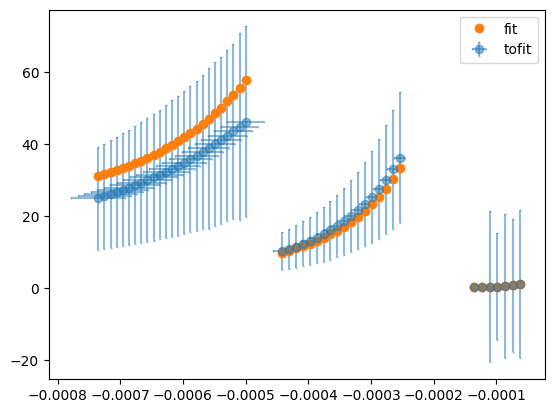

In [1704]:
plt.clf()
plt.errorbar( xs, zs, 
             yerr=dzs, xerr=dxs, 
             capsize=1, alpha=0.5, ls='none', marker='o', label='tofit' )

plt.plot( xs, zs2, ls='none', marker='o', label='fit' )


plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

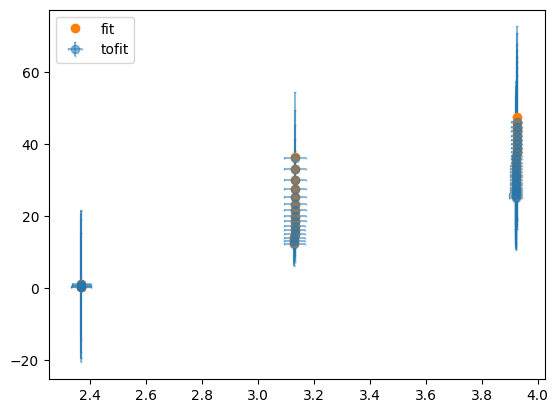

In [1589]:
plt.clf()
plt.errorbar( ys, zs, 
             yerr=dzs, xerr=dys, 
             capsize=1, alpha=0.5, ls='none', marker='o', label='tofit' )

plt.plot( ys, zs2, ls='none', marker='o', label='fit' )


plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

In [1590]:
opt[0]

array([2.29777080e+00, 8.56809628e+00, 8.19501848e-03, 5.29090197e-06,
       2.61356017e+00])

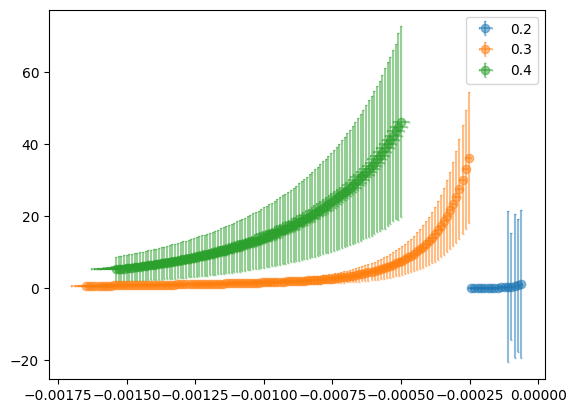

In [1591]:
plt.clf()
plt.errorbar( x_dx_y_dy_z_dz[0][0], x_dx_y_dy_z_dz[0][4], 
             yerr=x_dx_y_dy_z_dz[0][5], xerr=x_dx_y_dy_z_dz[0][1], 
             capsize=1, alpha=0.5, ls='none', marker='o', label='0.2' )

plt.errorbar( x_dx_y_dy_z_dz[1][0], x_dx_y_dy_z_dz[1][4], 
             yerr=x_dx_y_dy_z_dz[1][5], xerr=x_dx_y_dy_z_dz[1][1], 
             capsize=1, alpha=0.5, ls='none', marker='o', label='0.3' )

plt.errorbar( x_dx_y_dy_z_dz[2][0], x_dx_y_dy_z_dz[2][4], 
             yerr=x_dx_y_dy_z_dz[2][5], xerr=x_dx_y_dy_z_dz[2][1], 
             capsize=1, alpha=0.5, ls='none', marker='o', label='0.4' )

plt.legend()
# plt.plot( MBs, Tc_MB_fitter( MBs, fitparams[0], fitparams[1] ), ls='dashed' )
plt.show()

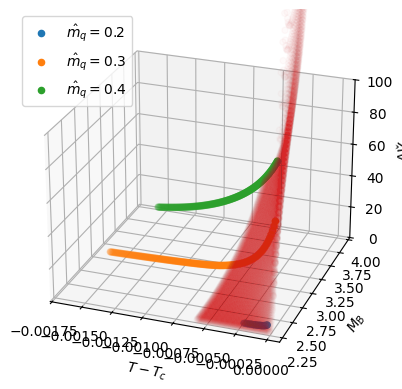

In [1599]:
plt.clf()
ax = plt.axes(projection='3d')

ax.scatter( x_dx_y_dy_z_dz[0][0], x_dx_y_dy_z_dz[0][2], x_dx_y_dy_z_dz[0][4], label='$\\hat{m}_q=0.2$' )
ax.scatter( x_dx_y_dy_z_dz[1][0], x_dx_y_dy_z_dz[1][2], x_dx_y_dy_z_dz[1][4], label='$\\hat{m}_q=0.3$' )
ax.scatter( x_dx_y_dy_z_dz[2][0], x_dx_y_dy_z_dz[2][2], x_dx_y_dy_z_dz[2][4], label='$\\hat{m}_q=0.4$' )

xx1 = np.repeat(np.linspace(-0.0006, -0.00002, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(2.3, 3.9, 100), 100).reshape(100,100).T
yy_fit2 = zs2 = f_S3hat( xx1, xx2 )
ax.scatter( xx1, xx2, yy_fit2, alpha=0.02 )

ax.view_init(elev=25, azim=-70, roll=0)

ax.set_zlim(0,100)
ax.set_xlabel("$T-T_c$")
ax.set_ylabel("$M_B$")
ax.set_zlabel("$\\Delta {V}\\check$")

plt.legend()

# plt.savefig("DeltaV.pdf", bbox_inches='tight')
plt.show()